In [1]:
import rasterio
import geopandas
import pandas as pd

In [2]:
df = geopandas.read_file("clc_bretagne.gpkg")

<AxesSubplot:>

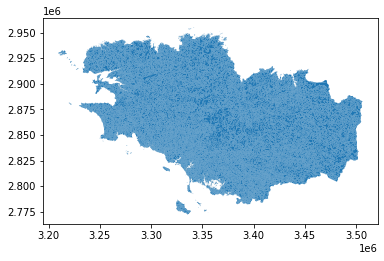

In [3]:
df.plot()

In [4]:
df

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry
0,514025,112,None,136.261359,EU_514025,"MULTIPOLYGON (((3350442.920 2942829.570, 33504..."
1,514032,112,None,161.757878,EU_514032,"MULTIPOLYGON (((3371666.563 2942611.482, 33716..."
2,514014,112,None,39.681608,EU_514014,"MULTIPOLYGON (((3357160.690 2943825.990, 33570..."
3,514058,112,None,97.555786,EU_514058,"MULTIPOLYGON (((3362252.340 2945971.850, 33622..."
4,514069,112,None,93.018102,EU_514069,"MULTIPOLYGON (((3352120.750 2946080.190, 33521..."
...,...,...,...,...,...,...
19196,517665,211,None,126.906731,EU_517665,"MULTIPOLYGON (((3505856.950 2883061.680, 35057..."
19197,530073,311,None,27.131770,EU_530073,"MULTIPOLYGON (((3505456.900 2882173.840, 35054..."
19198,453250,311,None,38.986890,EU_453250,"MULTIPOLYGON (((3505431.003 2880323.977, 35054..."
19199,526021,242,None,324.959935,EU_526021,"MULTIPOLYGON (((3504955.083 2883472.930, 35049..."


In [9]:
ls = []
for i in df["Code_18"]:
    i = int(i)
    if i >= 100 and i < 200:
        ls.append("Artificial Surfaces")
    if i >= 200 and i < 300:
        ls.append("Agricultural Areas")
    if i >= 300 and i < 400:
        ls.append("Forest and seminatural Areas")
    if i >= 400 and i < 500:
        ls.append("Wetlands")
    if i >= 500:
        ls.append("Water Bodies")
    if i < 100:
        ls.append("unclassified")

In [10]:
df["Code_simplified"] = ls

<AxesSubplot:>

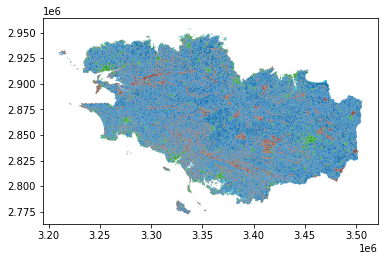

In [11]:
df.plot(column='Code_simplified')

In [12]:
df.to_file("bretagne_landCover.gpkg", layer='Land Cover', driver="GPKG")